In [1]:
import sys

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sys.path.append('../models')
import util

In [2]:
# Set random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

In [77]:
def simulate_data(x=None, shape=None, sd=0, dtype='float32'):
    assert not (x is None and shape is None)
    
    if x is None:
        x = np.random.randn(*shape)
    
    x = x.astype(dtype)
    
    # y = (0.5 * x) ** 2 + np.sin(x * 8) + np.random.randn(*shape) * sd
    y = (0.5 * x) ** 2 + np.sin(x * 4)
    
    return x, y + np.random.randn(x.shape[0], 1) * sd

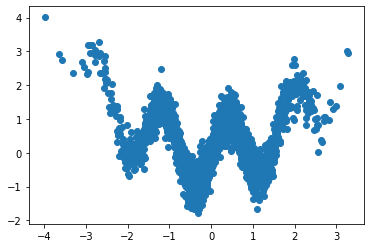

In [78]:
# Simulate data
num_obs = 3000
x, y = simulate_data(shape=(num_obs, 1), sd=.3)

# Plot data
plt.scatter(x, y)
plt.show()

In [180]:
# Bayesian model
# model = tf.keras.Sequential([
#     tfp.layers.DenseVariational(8,
#                                 util.make_default_dense_guide,
#                                 util.make_default_dense_prior,
#                                 kl_weight=1/num_obs,
#                                 activation='sigmoid'),
#     tfp.layers.DenseVariational(2,
#                                 util.make_default_dense_guide,
#                                 util.make_default_dense_prior,
#                                 kl_weight=1/num_obs),
#     tfp.layers.DistributionLambda(lambda t:
#         tfd.Normal(t[:, 0], util.smooth_relu(t[:, 1]))
#     )
# ])

# Model
reg = tf.keras.regularizers.l2(0)
act = 'sigmoid'
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, kernel_regularizer=reg, activation=act),
    tf.keras.layers.Dense(1, kernel_regularizer=reg)
])
model(x);

In [181]:
opt = tf.keras.optimizers.Adam(.1)
model.compile(optimizer=opt, loss='mse')

# Bayesian
# opt = tf.keras.optimizers.Adam(.1)
# model.compile(optimizer=opt, loss=util.neg_loglike)

In [182]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             multiple                  16        
_________________________________________________________________
dense_51 (Dense)             multiple                  9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [183]:
tf.random.set_seed(2)
history = model.fit(x, y, epochs=100, batch_size=100)

Train on 3000 samples
Epoch 1/100
3000/3000 [==============================] - 0s 104us/sample - loss: 0.7372
Epoch 2/100
3000/3000 [==============================] - 0s 16us/sample - loss: 0.6738
Epoch 3/100
3000/3000 [==============================] - 0s 16us/sample - loss: 0.6221
Epoch 4/100
3000/3000 [==============================] - 0s 29us/sample - loss: 0.5461
Epoch 5/100
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4182
Epoch 6/100
3000/3000 [==============================] - 0s 34us/sample - loss: 0.3659
Epoch 7/100
3000/3000 [==============================] - 0s 22us/sample - loss: 0.3350
Epoch 8/100
3000/3000 [==============================] - 0s 20us/sample - loss: 0.2904
Epoch 9/100
3000/3000 [==============================] - 0s 40us/sample - loss: 0.2338
Epoch 10/100
3000/3000 [==============================] - 0s 49us/sample - loss: 0.2171
Epoch 11/100
3000/3000 [==============================] - 0s 42us/sample - loss: 0.2005
Epoch 12/100
3000/

Epoch 94/100
3000/3000 [==============================] - 0s 37us/sample - loss: 0.1060
Epoch 95/100
3000/3000 [==============================] - 0s 32us/sample - loss: 0.1153
Epoch 96/100
3000/3000 [==============================] - 0s 35us/sample - loss: 0.1082
Epoch 97/100
3000/3000 [==============================] - 0s 34us/sample - loss: 0.1038
Epoch 98/100
3000/3000 [==============================] - 0s 37us/sample - loss: 0.1012
Epoch 99/100
3000/3000 [==============================] - 0s 31us/sample - loss: 0.1048
Epoch 100/100
3000/3000 [==============================] - 0s 31us/sample - loss: 0.1107


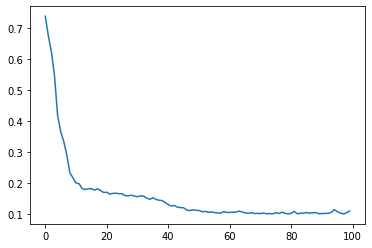

In [184]:
plt.plot(history.history['loss'])
plt.show()

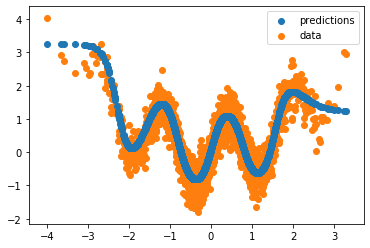

In [185]:
plt.scatter(x.squeeze(), model.predict(x).squeeze(), label='predictions', zorder=2)
plt.scatter(x.squeeze(), y.squeeze(), label='data', zorder=1)
plt.legend()
plt.show()